### Comparing PCA and t-SNE using scikit-learn
### Edgar Acuna
### Dataset:Bees_2p
### March 2020

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time


### French Bee data

In [5]:
bees=pd.read_csv("c://proybees/bees_2p.csv")
X1=bees.iloc[:,3:23]
#dropping two outliers bees 153 y 369
X2=X1.drop([152,368])

In [6]:
X2.describe()

,31m,31a,1m,1a,2m,2a,3m,3a,4m,4a,5m,5a,6m,6a,7m,7a,8m,8a,9m,9a
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.028947,0.871053,0.018421,1.568421,0.192105,1.113158,0.368421,1.518421,0.563158,1.644737,0.671053,2.415789,1.100000,2.792105,1.410526,3.636842,1.600000,4.386842,0.128947,1.836842
std,0.233600,1.647483,0.134646,1.872747,1.199138,1.899961,1.546484,2.727206,1.931194,2.805498,1.758419,3.520878,2.695741,3.910805,3.024071,4.922053,3.081651,6.282726,0.694269,5.367223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000,2.000000,5.000000,2.000000,6.000000,0.000000,2.000000
max,2.000000,15.000000,1.000000,18.000000,19.000000,15.000000,16.000000,22.000000,18.000000,20.000000,13.000000,33.000000,19.000000,24.000000,23.000000,44.000000,22.000000,58.000000,7.000000,57.000000


### Performing k-means to assign labels to the bees

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
kmeans = KMeans(n_clusters=2, random_state=0).fit(X2)
clustlabels=kmeans.labels_
print(clustlabels)

[0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0]


### Performing PCA

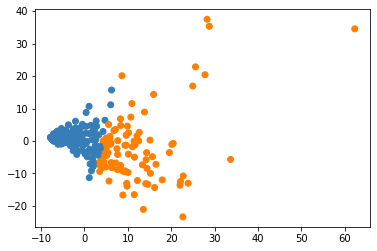

In [8]:
from matplotlib.colors import ListedColormap
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X2)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaDF.head()
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(clustlabels) + 1))))
plt.scatter(pcaDF['PC1'], pcaDF['PC2'],color=colors[clustlabels])
plt.show()

### t-SNE visualization for several perplexity values

bees, perplexity=5 in 3.6 sec
bees, perplexity=10 in 4 sec
bees, perplexity=15 in 3.9 sec
bees, perplexity=20 in 4 sec
bees, perplexity=30 in 4.5 sec
bees, perplexity=40 in 5.1 sec


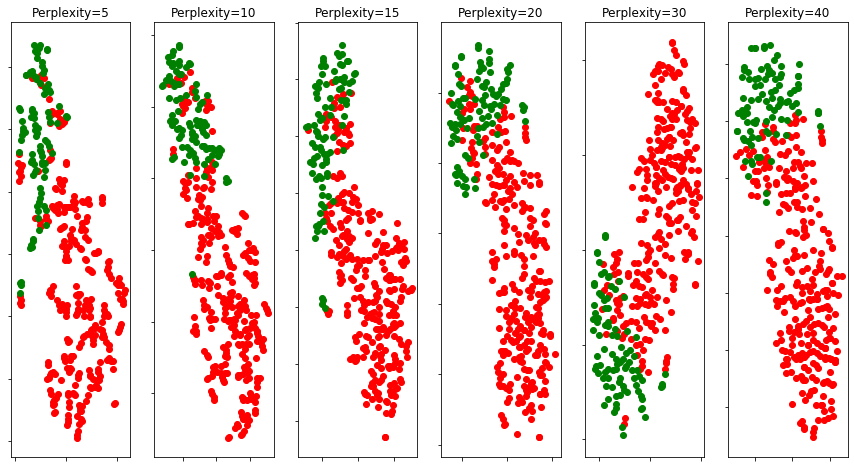

In [9]:
y=clustlabels
n_components = 2
(fig, subplots) = plt.subplots(1, 6, figsize=(15, 8),squeeze=False)
perplexities = [5, 10, 15, 20, 30, 40]

red = y == 0
green = y == 1


for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X2)
    t1 = time()
    print("bees, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



plt.show()

### Performing PCA to reduce the data from dimension 20 to dimension 9

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X2 = StandardScaler().fit_transform(X2)
principalComponents = pca.fit_transform(X2)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[6.32935333 2.12431006 1.49246472 1.1316136  1.05956205 0.94290329
 0.91486963 0.8504169  0.69296994]
[0.31563486 0.10593599 0.07442686 0.05643178 0.05283869 0.0470211
 0.0456231  0.04240895 0.03455732]
[0.31563486 0.42157085 0.4959977  0.55242949 0.60526817 0.65228927
 0.69791238 0.74032133 0.77487864]


### Performing t-SNE on the reduced data

bees, perplexity=5 in 3.3 sec
bees, perplexity=10 in 3.5 sec
bees, perplexity=15 in 3.7 sec
bees, perplexity=20 in 4.1 sec
bees, perplexity=50 in 4.2 sec
bees, perplexity=60 in 5.6 sec


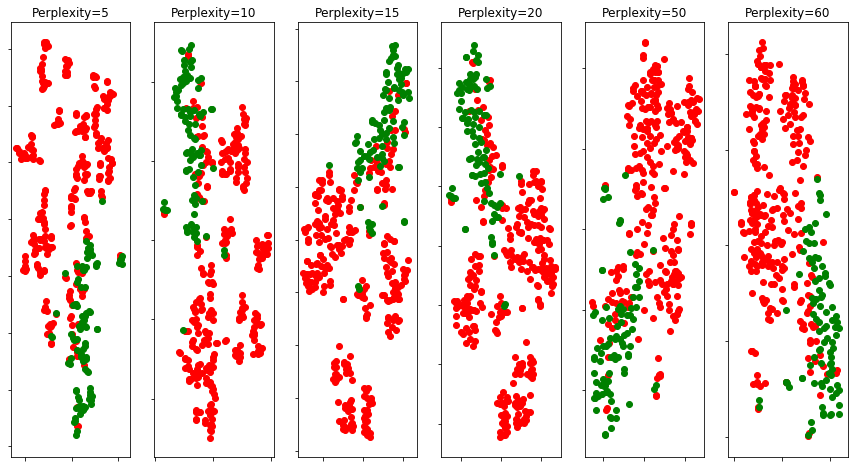

In [11]:
y=clustlabels
n_components = 2
(fig, subplots) = plt.subplots(1, 6, figsize=(15, 8),squeeze=False)
perplexities = [5, 10, 15, 20, 50, 60]

red = y == 0
green = y == 1


for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(pcaDF)
    t1 = time()
    print("bees, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



plt.show()